# Implementation of Shapiro's chapter 8 section 8.9

### Combined friction and heat transfer

Constant Pipe Temperature

0.5 0.55 0.7359648759765731 0.19478040053763446 0.6547105080645161
0.5 0.6179774379882865 0.8797023101174292 0.35556773539961295 1.0206097314757119
0.5 0.6898461550587146 1.1018992819512408 0.662517295889756 1.6569254774221929
0.5 0.8009446409756203 1.6896132265497035 1.8133821405202029 3.832475026747626
1.3862943611198906 dimensionless
0.5 0.55 0.5477738629956009 0.19478040053763446 0.6547105080645161
0.5 0.5238819314978005 0.5396355828862867 0.15332151290328566 0.5523539680089717
0.5 0.5198127914431434 0.5384898567588529 0.14762935926065301 0.5378864246903294
0.5 0.5192399283794265 0.5383310292358484 0.14684328203334002 0.535879365404089
0.5 0.5191605146179242 0.5383090592269661 0.14673460511533543 0.5356017070170701
0.5383090592269661 0.5883090592269662 0.5968836878939126 0.27422784028380315 0.8401705053447538
0.5383090592269661 0.5675913735604394 0.588905904922751 0.22817175671987344 0.7340689591999119
0.5383090592269661 0.5636024820748586 0.5874935085383799 0.22017122701762912 0.7

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0.5586905376395547 0.18330546786186871 0.6268567896796721
0.527204710205041 0.5429426239222979 0.5586133649817295 0.18268452114757489 0.6253399965548825
0.5586133649817295 0.6086133649817296 0.6044143239665677 0.3276979835732303 0.9596189472807041
0.5586133649817295 0.5815088444741486 0.5969445011802205 0.2582357704479632 0.8037118559460908
0.5586133649817295 0.577773933080975 0.596015294058819 0.24982653628898221 0.7843843013344561
0.5586133649817295 0.5773093295202743 0.5959012753383133 0.2487984550211492 0.7820136189484425
0.5586133649817295 0.5772523201600215 0.5958873083089048 0.2486725747317283 0.7817232293471406
0.5958873083089048 0.6458873083089047 0.6510976133238355 0.4529142065663257 1.2284010001842383
0.5958873083089048 0.6234874608163702 0.6434763382358352 0.373016033791889 1.058415902705196
0.5958873083089048 0.61967682327237 0.642292218728599 0.36086343999483306 1.032113507802383
0.5958873083089048 0.619084763518752 0.6421109736847137 0.3590098783623843 1.0280900070157513

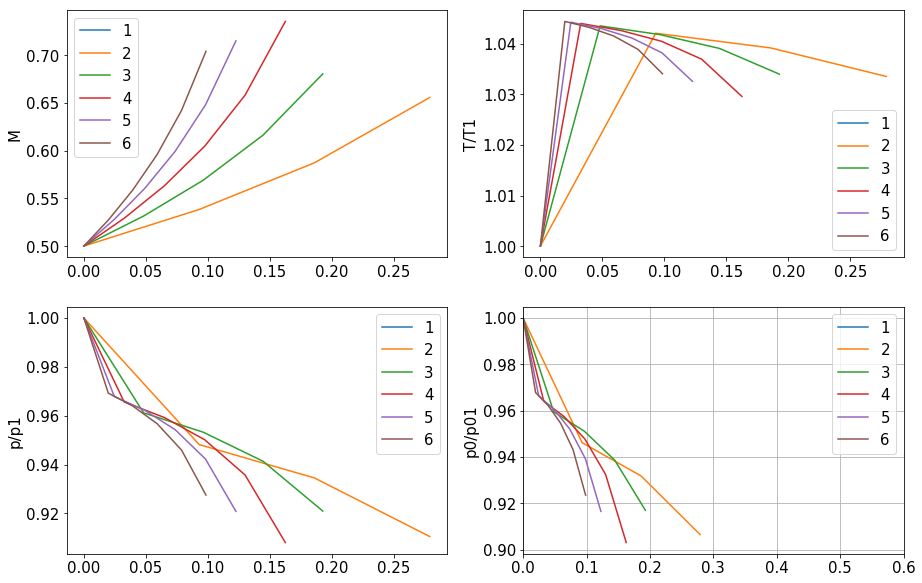

In [26]:
import pint
import numpy as np
import matplotlib.pyplot as plt
u = pint.UnitRegistry()
#from scipy.integrate import solve_ivp
#cp = 1000 * u.joule / u.kilogram / u.kelvin
k = 1.4
f = 0.005 #friction factor
D = 1 * u.meter
M0 = 0.5
#T0 = 350 * u.kelvin
ReynoldAnalogy = True
T02_T01 = 1.05
x0 = 0 * u.meter
Tw0_T01 = 4
n=1000
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({'font.size': 15})

def F_T0(M):
    FT0 = M**2*(1+k*M**2)*(1+(k-1)/2*M**2)/(1-M**2)
    return FT0

def F_f(M):
    Ff = k*M**4*(1+(k-1)/2*M**2)/(1-M**2)
    return Ff


def dM2(M):
    _x_1 = x0
    _M_1 = M
    if ReynoldAnalogy:
        _x2 = D / (2 * f) * np.log((Tw0_T01-1)/(Tw0_T01-T02_T01)) + _x_1
        _M_2 = _M_1 + 0.1
        converged = False
        while not converged:
            Mbar = (_M_1+_M_2) / 2
            if Mbar>=1.0:
                M2=1
                break
            Fbar_T0 = F_T0(Mbar)
            Fbar_f = F_f(Mbar)
            M2 = np.sqrt(_M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*Tw0_T01-T02_T01-1)))
            print(M, Mbar, M2, Fbar_f, Fbar_T0)
            #print(M2,_x2, _M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*Tw0_T01-T02_T01-1)),Fbar_T0,Fbar_f)
            #print(M2)
            if (np.abs(_M_2-M2)>0.0001):
                _M_2 = M2 - 0.00001
            else:
                converged = True
    return M2,_x2

def T2_T1(M1,M2):
    _T2_T1=T02_T01*(1+(k-1)/2*M1**2)/(1+(k-1)/2*M2**2)
    return _T2_T1

def p2_p1(M1,M2):
    _p2_p1 = M1/M2*np.sqrt(T02_T01*(1+(k-1)/2*M1**2)/(1+(k-1)/2*M2**2))
    return _p2_p1

def p02_p01(M1,M2):
    _p02_p01=M1/M2*np.sqrt(T02_T01*(1+(k-1)/2*M1**2)/(1+(k-1)/2*M2**2))*((1+(k-1)/2*M1**2)/(1+(k-1)/2*M2**2))**((k-1)/k)
    return _p02_p01

fxD = np.zeros((n+1,8))
MM = np.zeros((n+1,8))
T2T1 = np.zeros((n+1,8))
p2p1 = np.zeros((n+1,8))
p02p01 = np.zeros((n+1,8))

for j in range(1,7):
    #print("----------------------------------------------")
    x0 = 0 * u.meter
    Tw0_T01 = j+0.1
    M = M0
    fxD[0] = 4*f*x0/D
    MM[0] = M0
    T2T1[0] = 1.0
    p2p1[0] = 1.0
    p02p01[0] = 1.0
    for i in range(n):
        M, x2 = dM2(M)
        x0 = x2
        MM[i+1,j] = M
        if MM[i+1,j]== 1.0: #MM[i+1,j]:
            print(4*f*x0/D)
            break
        T2T1[i+1,j]=T2_T1(MM[i,j],MM[i+1,j])
        p2p1[i+1,j]=p2_p1(MM[i,j],MM[i+1,j])
        p02p01[i+1,j]=p02_p01(MM[i,j],MM[i+1,j])
        fxD[i+1,j] = 4*f*x0/D
        
    plt.subplot(2,2,1)
    plt.plot(fxD[0:i,j],MM[0:i,j],label=j)
    plt.ylabel("M")
    plt.legend()
    plt.grid()
    plt.subplot(2,2,2)
    plt.ylabel("T/T1")
    plt.plot(fxD[0:i,j],T2T1[0:i,j],label=j)
    plt.legend()
    plt.grid()
    plt.subplot(2,2,3)
    plt.ylabel("p/p1")
    plt.plot(fxD[0:i,j],p2p1[0:i,j],label=j)
    plt.legend()
    plt.grid()
    plt.subplot(2,2,4)
    plt.ylabel("p0/p01")
    plt.plot(fxD[0:i,j],p02p01[0:i,j],label=j)
    
plt.xlim(0,0.6)
plt.legend()
plt.grid()
plt.show()
    

In [99]:
MM[:,1]

array([0.5, 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. ])

In [100]:
MM[:,2]

array([0.5       , 0.53830475, 0.58718353, 0.65555277, 0.77811245,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [101]:
MM[:,3]

array([0.5       , 0.53139866, 0.56899393, 0.61612104, 0.68022537,
       0.7875988 , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [102]:
MM[:,4]

array([0.5       , 0.52907117, 0.56317546, 0.60461698, 0.65794745,
       0.73510131, 0.9481634 , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [103]:
MM[:,5]

array([0.5       , 0.52790151, 0.56030415, 0.5990904 , 0.64782201,
       0.71481478, 0.83452127, 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [104]:
MM[:,6]

array([0.5       , 0.52719778, 0.55859299, 0.59585225, 0.64203104,
       0.70384198, 0.80441527, 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])